# Poincare Maps projection on Globins0.9 

In [51]:
import os
import numpy as np
import pandas as pd
import plotly.express as px
from pplots_new import read_embeddings, plot_embedding, plot_embedding_interactive, rotate, get_colors
import warnings
#warnings.filterwarnings('ignore')

import plotly.offline as pyo
pyo.init_notebook_mode()

%matplotlib inline

In [52]:
# read the globin annotation csv file
globin_df = pd.read_csv("globin_colors_new.csv", index_col = 0) 


# construct the palette 
globin_palette = {-1 : "#c7c7c7", "OTHER": "#c7c7c7", "NA" : "#c7c7c7", "Uncharacterized" : "#c7c7c7", "root": "#000000",
                 "Nematostella": "#ad288b", "Amphimedon": "#fdb7fd", "Micromonas": "#4d9b03", "Saccoglossus":"#b0ffe8", "Trichoplax":"#e9bd6b" } 

globin_others_eukaryota = ["Amphimedon", # porifera 
 "Saccoglossus", # hemichordata
 "Trichoplax", # placozoa
 "Micromonas", # viridiplantae
 "Nematostella" ] # cnidaria  
 
globin_arthropoda = ["Stegodyphus", "Strigamia", "Scylla", "Carcinus",  "Ixodes", "Zootermopsis", "Coptotermes","Oryctes", "Tetranychus", 
                     "Acyrthosiphon", "Nemastomella","Apis","Solenopsis", "Habropoda", "Fopius", "Cerapachys", "Camponotus", "Nasonia", 
                     "Acromyrmex", "Tribolium", "Sarcoptes", "Lutzomyia", "Rhodnius", "Triatoma", "Cherax", "Chironomus", "Polypedilum", 
                     "Pediculus", "Daphnia", "Harpegnathos", "Artemia", "Parartemia", "Lepeophtheirus", "Glossina", "Operophtera"] 
  
globin_mollusca = ["Arion", "Crassostrea", "Lottia", "Anadara", "Spisula", "Barbatia", "Nassarius", "Cerithidea", "Nerita", "Phacoides",
                   "Octopus", "Biomphalaria"] 
globin_annelida = ["Capitella", "Metaphire"]  
globin_chordata = ["Scleropages", "Branchiostoma", "Xenopus", "Oreochromis", "Nothobranchius", "Gasterosteus", "Bos", "Iguana", "Oryzias", 
                   "Anas", "Tetraodon", "Takifugu", "Xiphophorus", "Larimichthys", "Oncorhynchus", "Alligator", "Astyanax", "Latimeria",
                   "Ictalurus", "Chaenocephalus", "Danio", "Cyprinus", "Callorhinchus", "Lepisosteus", "Chelonia", "Poecilia", "Ciona", 
                   "Petromyzon", "Lethenteron", "Cavia", "Scalopus", "Neotoma", "Pelodiscus","Fundulus", "Oryctolagus", "Anolis",
                   "Salmo", "Amazona", "Ornithorhynchus", "Sarcophilus", "Gallus", "Nomascus", "Tupaia"] 
 
globin_echinodermata = ["Caudina", "Strongylocentrotus", "Hemipholis", "Ophiactis"] 
globin_bacteria = ["Gemmatirosa", "Halothiobacillus"] 
globin_nematoda = ["Ancylostoma", "Necator", "Caenorhabditis", "Haemonchus", "Ascaris", "Trichinella", "Globodera", "Strongyloides", "Angiostrongylus"] 
globin_fungi = ["Blastobotrys", "Cyberlindnera"] 


#globin_palette.update(dict.fromkeys(globin_others_eukaryota, "#22ba69")) 
globin_palette.update(dict.fromkeys(globin_arthropoda, "#0b237c"))
globin_palette.update(dict.fromkeys(globin_mollusca, "#512ff8")) #512ff8 401bf9
globin_palette.update(dict.fromkeys(globin_annelida, "#a191f3"))
globin_palette.update(dict.fromkeys(globin_chordata, "#26c9d9"))
globin_palette.update(dict.fromkeys(globin_echinodermata, "#086b75"))
globin_palette.update(dict.fromkeys(globin_bacteria, "#f10000"))
globin_palette.update(dict.fromkeys(globin_nematoda, "#5d78e3"))
globin_palette.update(dict.fromkeys(globin_fungi, "#a0e361"))
                           

# Globines0.9 - by name (short_name) 

## KNN 5 gamma 2 (batchsize 4 epochs 1000)

In [53]:
path_embedding = os.getcwd() + "/data/globins_out0.9/batchsize4_epochs1000/PM5sigma=1.00gamma=2.00cosinepca=0_seed0.csv" 
path_annotation = os.getcwd() + "/data/globin_colors_new.csv"
df5 = read_embeddings(path_embedding, path_annotation, withroot=False)
#df5 = df5[df5["short_name"] != "Uncharacterized"]

result:                    pm1       pm2 tree1 tree2 tree3 tree4  \
proteins_id                                               
1            0.000398 -0.464787     5     3     3     2   
2           -0.115324 -0.202300    -1    28    18    10   
3           -0.122176 -0.432886    -1    27    18    10   
4           -0.102584 -0.585725    37    27    18    10   
5           -0.151564 -0.510573    37    27    18    10   
...               ...       ...   ...   ...   ...   ...   
248          0.143604  0.833216    14    10     9     3   
249          0.140482  0.871515    -1    10     9     3   
250          0.114320  0.839546    14    10     9     3   
251          0.092330  0.868843    14    10     9     3   
252          0.686787 -0.545181    -1    25    15     8   

                           full_name       short_name  \
proteins_id                                             
1                 Globin C, coelomic           Globin   
2                  Globin (Fragment)           Globi

Index(['tree1', 'tree2', 'tree3', 'tree4', 'full_name', 'short_name',
       'full_species', 'short_species', 'evo_distance'],
      dtype='object')


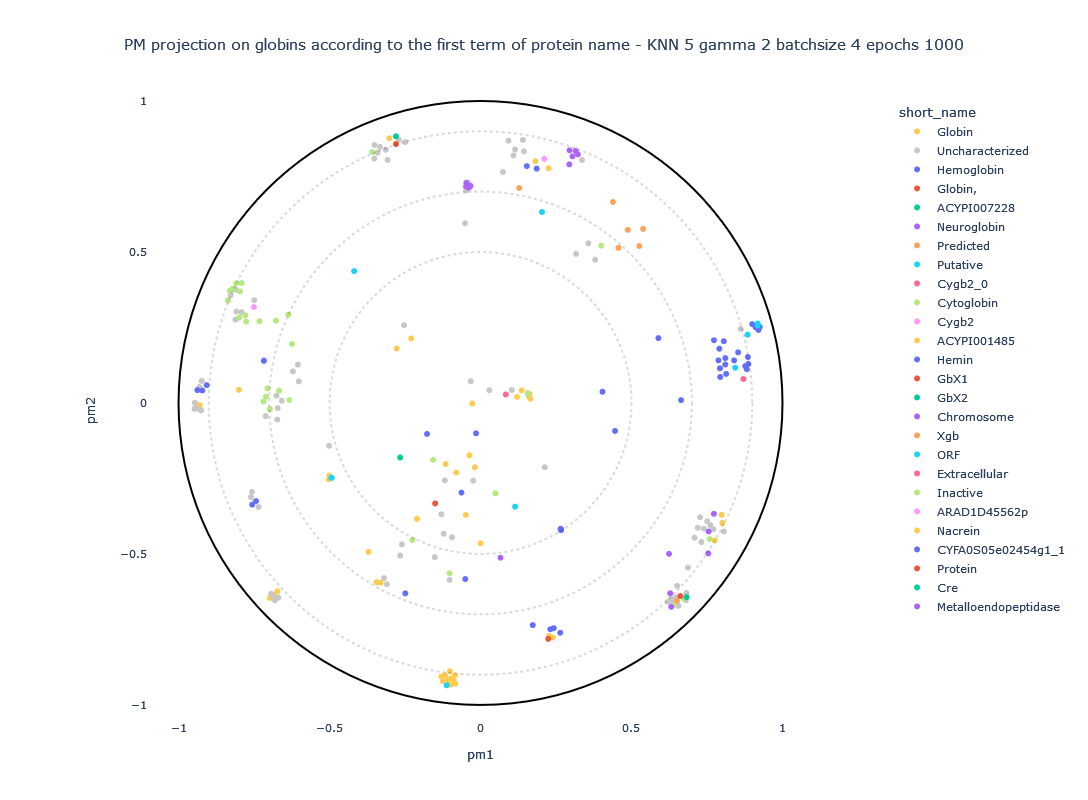

In [54]:
trace1 = plot_embedding_interactive(df5, 
                                    labels_name = 'short_name',
                                    show_text=True, 
                                    color_palette = globin_palette, 
                                    title = "PM projection on globins according to the first term of protein name - KNN 5 gamma 2 batchsize 4 epochs 1000", 
                                    fontsize = 11
                              )
trace1.show()

## KNN 5 gamma 2 (batchsize 4 epochs 1000 rotate)

In [55]:
path_embedding = os.getcwd() + "/data/globins_out0.9_rot/batchsize4_epochs1000/PM5sigma=1.00gamma=2.00cosinepca=0_seed0.csv" 
path_annotation = os.getcwd() + "/data/globin_colors_new.csv"
df5 = read_embeddings(path_embedding, path_annotation, withroot=True)
#df5 = df5[df5["short_name"] != "Uncharacterized"]

ici                   pm1       pm2
proteins_id                    
1            0.036776 -0.105183
2           -0.250971  0.036009
3           -0.267656 -0.078951
4           -0.211204 -0.137204
5           -0.264735 -0.152516
...               ...       ...
249          0.852193 -0.010679
250          0.803275 -0.031390
251          0.835126 -0.079692
252         -0.395740  0.763850
0            0.000000  0.000000

[253 rows x 2 columns]
result:                    pm1       pm2 tree1 tree2 tree3 tree4  \
proteins_id                                               
0            0.000000  0.000000  root  root  root  root   
1            0.036776 -0.105183     5     3     3     2   
2           -0.250971  0.036009    -1    28    18    10   
3           -0.267656 -0.078951    -1    27    18    10   
4           -0.211204 -0.137204    37    27    18    10   
...               ...       ...   ...   ...   ...   ...   
248          0.797280  0.007985    14    10     9     3   
249          0.8

Index(['tree1', 'tree2', 'tree3', 'tree4', 'full_name', 'short_name',
       'full_species', 'short_species', 'evo_distance'],
      dtype='object')


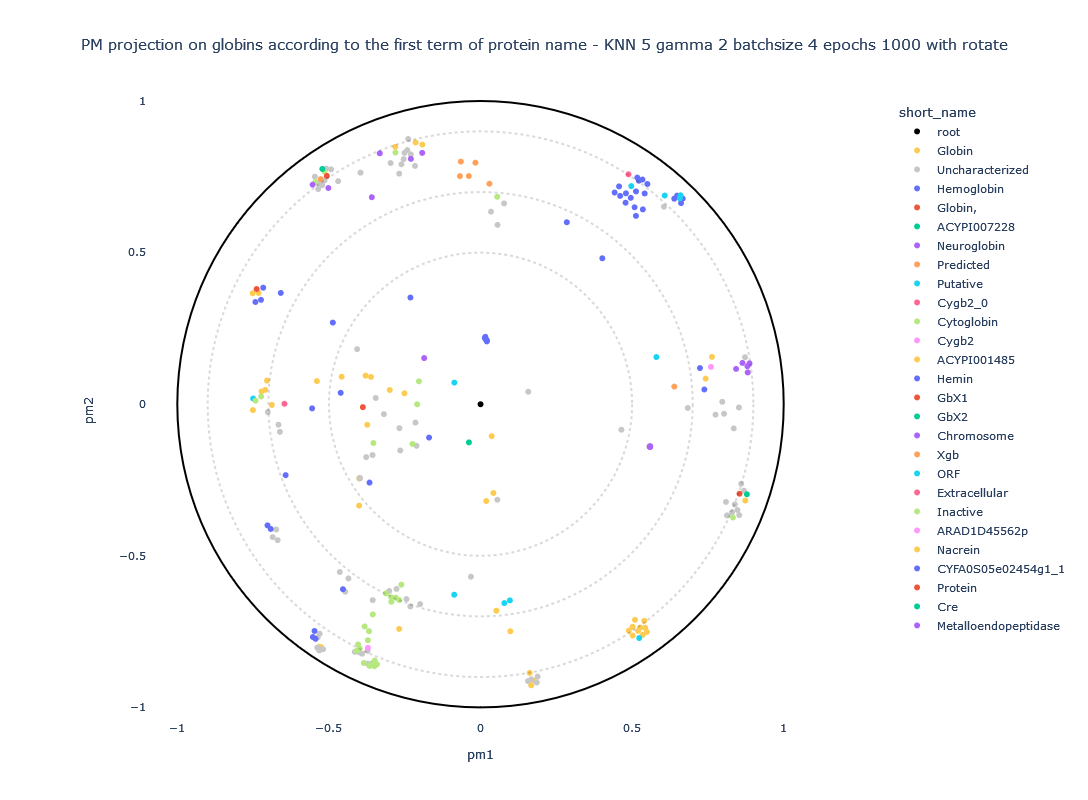

In [56]:
trace1 = plot_embedding_interactive(df5, 
                                    labels_name = 'short_name',
                                    show_text=True, 
                                    color_palette = globin_palette, 
                                    title = "PM projection on globins according to the first term of protein name - KNN 5 gamma 2 batchsize 4 epochs 1000 with rotate", 
                                    fontsize = 11
                              )
trace1.show()

# Globines0.9 - by species (short_specie)

## KNN 5 gamma 2 (batchsize 4 epochs 1000)

In [57]:
path_embedding = os.getcwd() + "/data/globins_out0.9/batchsize4_epochs1000/PM5sigma=1.00gamma=2.00cosinepca=0_seed0.csv" 
path_annotation = os.getcwd() + "/data/globin_colors_new.csv"
df5 = read_embeddings(path_embedding, path_annotation, withroot=False)

result:                    pm1       pm2 tree1 tree2 tree3 tree4  \
proteins_id                                               
1            0.000398 -0.464787     5     3     3     2   
2           -0.115324 -0.202300    -1    28    18    10   
3           -0.122176 -0.432886    -1    27    18    10   
4           -0.102584 -0.585725    37    27    18    10   
5           -0.151564 -0.510573    37    27    18    10   
...               ...       ...   ...   ...   ...   ...   
248          0.143604  0.833216    14    10     9     3   
249          0.140482  0.871515    -1    10     9     3   
250          0.114320  0.839546    14    10     9     3   
251          0.092330  0.868843    14    10     9     3   
252          0.686787 -0.545181    -1    25    15     8   

                           full_name       short_name  \
proteins_id                                             
1                 Globin C, coelomic           Globin   
2                  Globin (Fragment)           Globi

Index(['tree1', 'tree2', 'tree3', 'tree4', 'full_name', 'short_name',
       'full_species', 'short_species', 'evo_distance'],
      dtype='object')


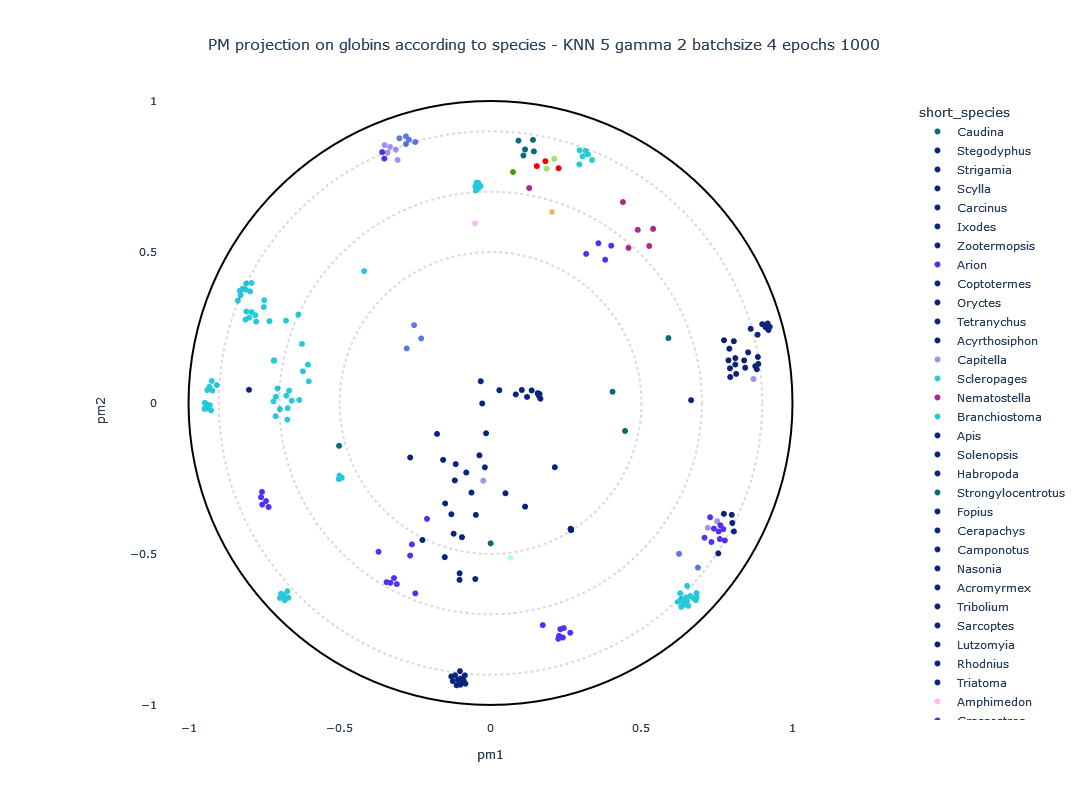

In [58]:
trace1 = plot_embedding_interactive(df5, 
                                    labels_name = 'short_species',
                                    show_text=True, 
                                    color_palette = globin_palette,
                                    title = "PM projection on globins according to species - KNN 5 gamma 2 batchsize 4 epochs 1000", 
                                    fontsize = 11
                                   )
trace1.show()

## KNN 5 gamma 2 (batchsize 4 epochs 1000 rotate)

In [59]:
path_embedding = os.getcwd() + "/data/globins_out0.9_rot/batchsize4_epochs1000/PM5sigma=1.00gamma=2.00cosinepca=0_seed0.csv" 
path_annotation = os.getcwd() + "/data/globin_colors_new.csv"
df5 = read_embeddings(path_embedding, path_annotation, withroot=True)

ici                   pm1       pm2
proteins_id                    
1            0.036776 -0.105183
2           -0.250971  0.036009
3           -0.267656 -0.078951
4           -0.211204 -0.137204
5           -0.264735 -0.152516
...               ...       ...
249          0.852193 -0.010679
250          0.803275 -0.031390
251          0.835126 -0.079692
252         -0.395740  0.763850
0            0.000000  0.000000

[253 rows x 2 columns]
result:                    pm1       pm2 tree1 tree2 tree3 tree4  \
proteins_id                                               
0            0.000000  0.000000  root  root  root  root   
1            0.036776 -0.105183     5     3     3     2   
2           -0.250971  0.036009    -1    28    18    10   
3           -0.267656 -0.078951    -1    27    18    10   
4           -0.211204 -0.137204    37    27    18    10   
...               ...       ...   ...   ...   ...   ...   
248          0.797280  0.007985    14    10     9     3   
249          0.8

Index(['tree1', 'tree2', 'tree3', 'tree4', 'full_name', 'short_name',
       'full_species', 'short_species', 'evo_distance'],
      dtype='object')


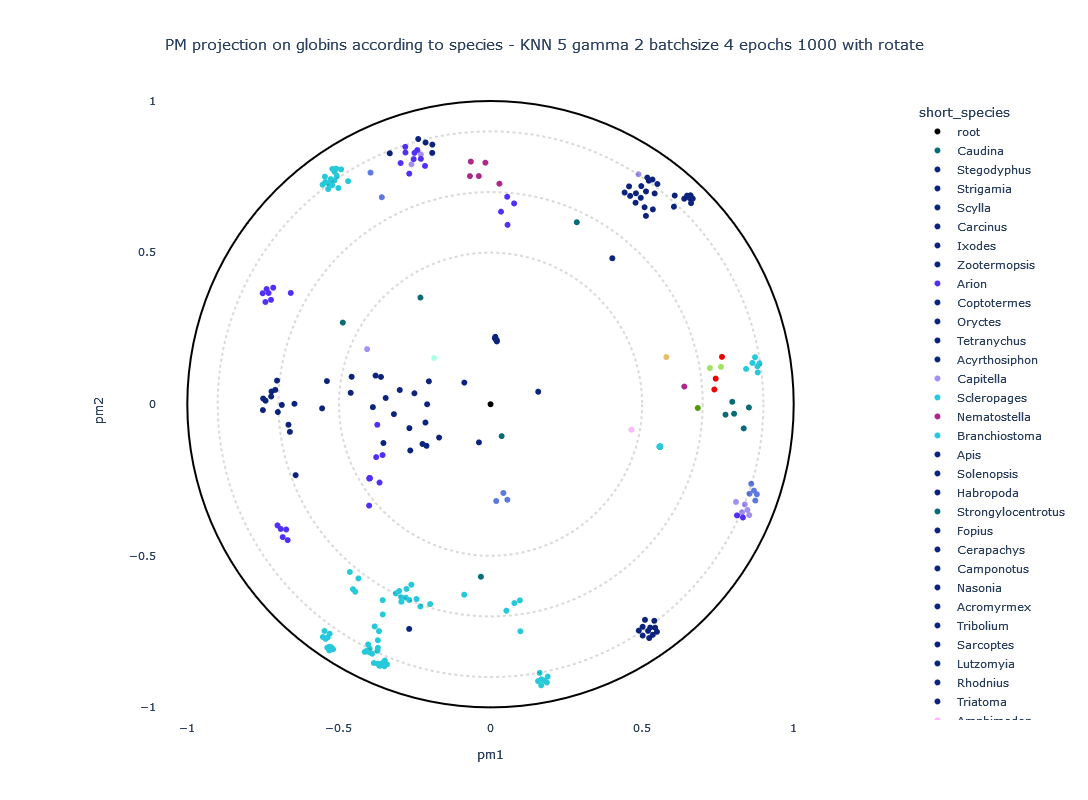

In [60]:
trace1 = plot_embedding_interactive(df5, 
                                    labels_name = 'short_species',
                                    show_text=True, 
                                    color_palette = globin_palette,
                                    title = "PM projection on globins according to species - KNN 5 gamma 2 batchsize 4 epochs 1000 with rotate", 
                                    fontsize = 11
                                   )
trace1.show()

# Globins0.9 - tree4

## KNN 5 gamma 2 (batchsize 4 epochs 500)

In [61]:
path_embedding = os.getcwd() + "/data/globins_out0.9/batchsize4_epochs500/PM5sigma=1.00gamma=2.00cosinepca=0_seed0.csv" 
path_annotation = os.getcwd() + "/data/globin_colors_new.csv"
df5 = read_embeddings(path_embedding, path_annotation, withroot=False)
#df5["tree4"] = df5["tree4"].astype("object") 

result:                    pm1       pm2 tree1 tree2 tree3 tree4  \
proteins_id                                               
1            0.120855 -0.022360     5     3     3     2   
2           -0.225121  0.173950    -1    28    18    10   
3           -0.375117  0.268016    -1    27    18    10   
4           -0.555026  0.327245    37    27    18    10   
5           -0.470810  0.333505    37    27    18    10   
...               ...       ...   ...   ...   ...   ...   
248          0.716765 -0.377464    14    10     9     3   
249          0.764783 -0.367920    -1    10     9     3   
250          0.727815 -0.341899    14    10     9     3   
251          0.778025 -0.312872    14    10     9     3   
252          0.023928 -0.855420    -1    25    15     8   

                           full_name       short_name  \
proteins_id                                             
1                 Globin C, coelomic           Globin   
2                  Globin (Fragment)           Globi

Index(['tree1', 'tree2', 'tree3', 'tree4', 'full_name', 'short_name',
       'full_species', 'short_species', 'evo_distance'],
      dtype='object')


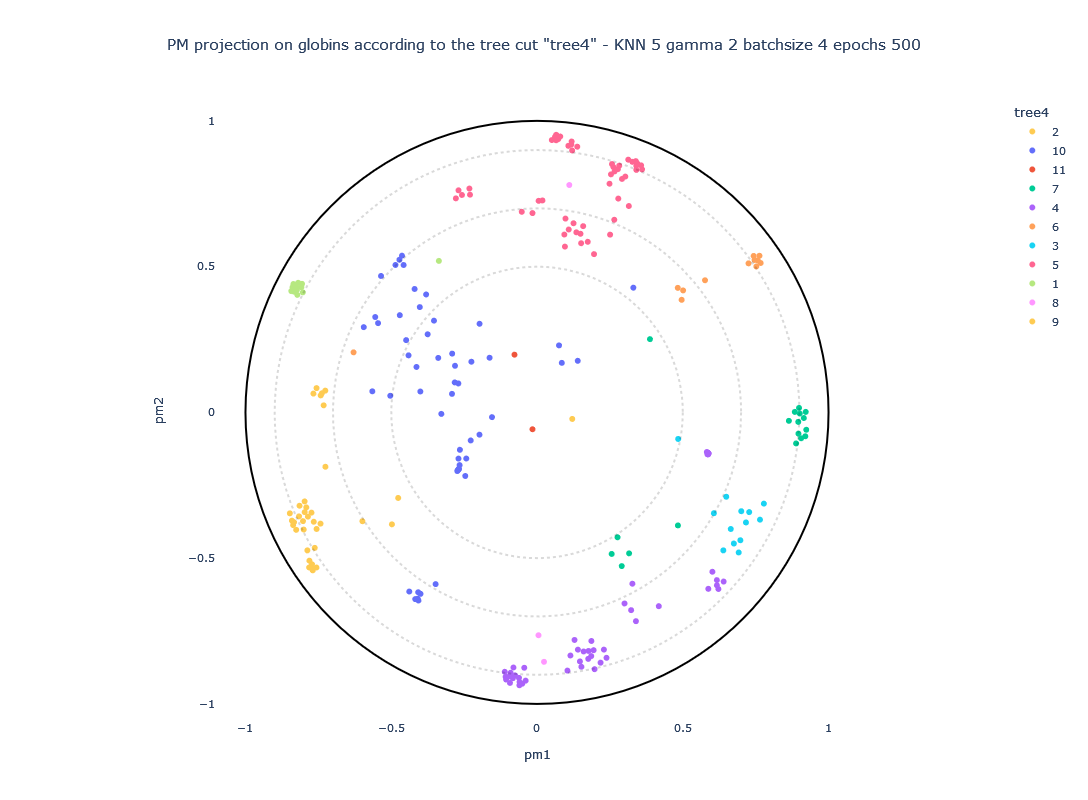

In [62]:
trace1 = plot_embedding_interactive(df5, 
                                    labels_name = 'tree4',
                                    show_text=True, 
                                    color_palette = globin_palette,
                                    title = "PM projection on globins according to the tree cut \"tree4\" - KNN 5 gamma 2 batchsize 4 epochs 500",
                                    fontsize = 11
                              )
trace1.show()

## KNN 5 gamma 2 (batchsize 4 epochs 500 rotate)

In [63]:
path_embedding = os.getcwd() + "/data/globins_out0.9_rot/batchsize4_epochs500/PM5sigma=1.00gamma=2.00cosinepca=0_seed0.csv" 
path_annotation = os.getcwd() + "/data/globin_colors_new.csv"
df5 = read_embeddings(path_embedding, path_annotation, withroot=True)
#df5["tree4"] = df5["tree4"].astype("object") 

ici                   pm1       pm2
proteins_id                    
0            0.000000  0.000000
1            0.101009  0.155808
2            0.372715  0.071014
3            0.207179  0.055769
4            0.178458  0.041596
...               ...       ...
248         -0.486426  0.072152
249         -0.458604  0.067920
250         -0.466011  0.071947
251         -0.459236  0.068002
252         -0.004909  0.745213

[253 rows x 2 columns]
result:                    pm1       pm2 tree1 tree2 tree3 tree4  \
proteins_id                                               
0            0.000000  0.000000  root  root  root  root   
1            0.101009  0.155808     5     3     3     2   
2            0.372715  0.071014    -1    28    18    10   
3            0.207179  0.055769    -1    27    18    10   
4            0.178458  0.041596    37    27    18    10   
...               ...       ...   ...   ...   ...   ...   
248         -0.486426  0.072152    14    10     9     3   
249         -0.4

Index(['tree1', 'tree2', 'tree3', 'tree4', 'full_name', 'short_name',
       'full_species', 'short_species', 'evo_distance'],
      dtype='object')


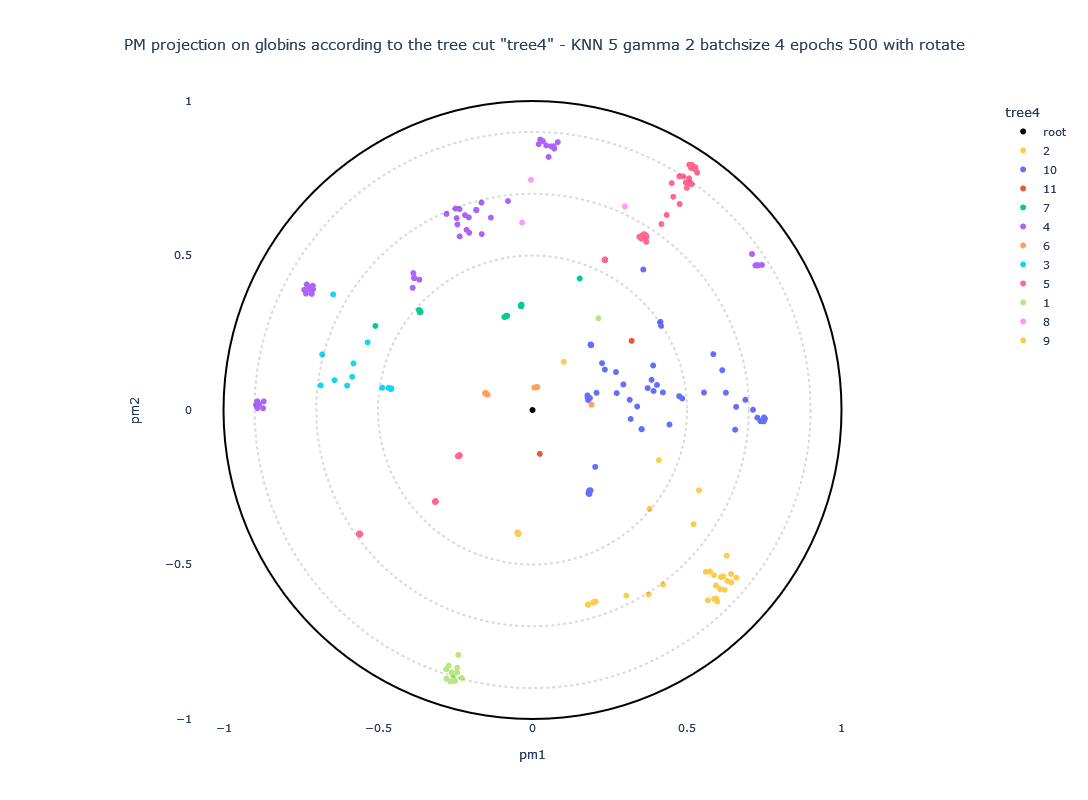

In [64]:
trace1 = plot_embedding_interactive(df5, 
                                    labels_name = 'tree4',
                                    show_text=True, 
                                    color_palette = globin_palette, 
                                    title = "PM projection on globins according to the tree cut \"tree4\" - KNN 5 gamma 2 batchsize 4 epochs 500 with rotate",
                                    fontsize = 11
                              )
trace1.show()

## KNN 6 gamma 2 (batchsize 4 epochs 1000)

In [65]:
path_embedding = os.getcwd() + "/data/globins_out0.9/batchsize4_epochs1000/PM6sigma=1.00gamma=2.00cosinepca=0_seed0.csv" 
path_annotation = os.getcwd() + "/data/globin_colors_new.csv"
df6 = read_embeddings(path_embedding, path_annotation, withroot=False)
#df6["tree4"] = df6["tree4"].astype("object") 

result:                    pm1       pm2 tree1 tree2 tree3 tree4  \
proteins_id                                               
1            0.094520 -0.020237     5     3     3     2   
2            0.288463  0.100659    -1    28    18    10   
3            0.293880  0.246645    -1    27    18    10   
4            0.289246  0.311650    37    27    18    10   
5            0.288831  0.327628    37    27    18    10   
...               ...       ...   ...   ...   ...   ...   
248         -0.222689 -0.614549    14    10     9     3   
249         -0.244695 -0.636233    -1    10     9     3   
250         -0.233987 -0.574343    14    10     9     3   
251         -0.276448 -0.611828    14    10     9     3   
252         -0.767432 -0.178713    -1    25    15     8   

                           full_name       short_name  \
proteins_id                                             
1                 Globin C, coelomic           Globin   
2                  Globin (Fragment)           Globi

Index(['tree1', 'tree2', 'tree3', 'tree4', 'full_name', 'short_name',
       'full_species', 'short_species', 'evo_distance'],
      dtype='object')


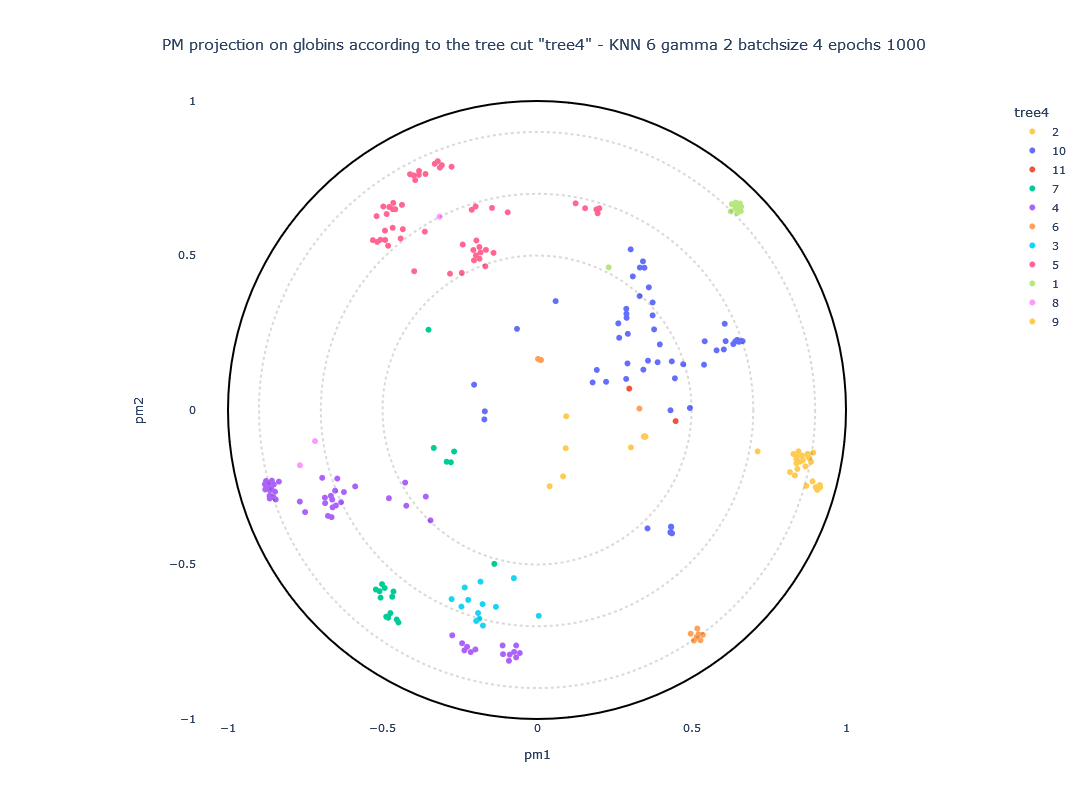

In [66]:
trace1 = plot_embedding_interactive(df6, 
                                    labels_name = 'tree4',
                                    #show_text=True, 
                                    color_palette = globin_palette,
                                    title = "PM projection on globins according to the tree cut \"tree4\" - KNN 6 gamma 2 batchsize 4 epochs 1000",
                                    fontsize = 11
                              )
trace1.show()

## KNN 6 gamma 2 (batchsize 4 epochs 1000 rotate)

In [67]:
path_embedding = os.getcwd() + "/data/globins_out0.9_rot/batchsize4_epochs1000/PM6sigma=1.00gamma=2.00cosinepca=0_seed0.csv" 
path_annotation = os.getcwd() + "/data/globin_colors_new.csv"
df6 = read_embeddings(path_embedding, path_annotation, withroot=True)
#df6["tree4"] = df6["tree4"].astype("object") 

ici                   pm1       pm2
proteins_id                    
0            0.000000  0.000000
1           -0.104789 -0.078420
2           -0.212542  0.038752
3           -0.219747 -0.038307
4           -0.212564 -0.078209
...               ...       ...
248          0.223572  0.410278
249          0.187930  0.408034
250          0.189685  0.378373
251          0.143906  0.410937
252          0.646287 -0.236569

[253 rows x 2 columns]
result:                    pm1       pm2 tree1 tree2 tree3 tree4  \
proteins_id                                               
0            0.000000  0.000000  root  root  root  root   
1           -0.104789 -0.078420     5     3     3     2   
2           -0.212542  0.038752    -1    28    18    10   
3           -0.219747 -0.038307    -1    27    18    10   
4           -0.212564 -0.078209    37    27    18    10   
...               ...       ...   ...   ...   ...   ...   
248          0.223572  0.410278    14    10     9     3   
249          0.1

Index(['tree1', 'tree2', 'tree3', 'tree4', 'full_name', 'short_name',
       'full_species', 'short_species', 'evo_distance'],
      dtype='object')


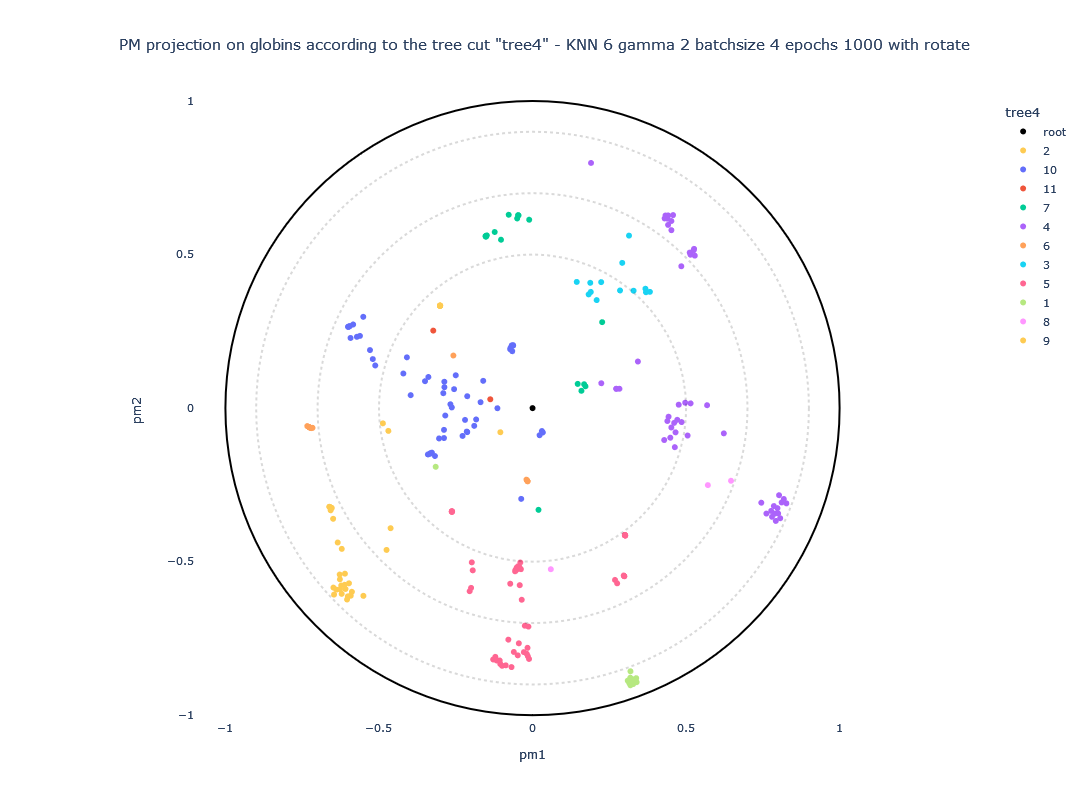

In [68]:
trace1 = plot_embedding_interactive(df6, 
                                    labels_name = 'tree4',
                                    #show_text=True, 
                                    color_palette = globin_palette,
                                    title = "PM projection on globins according to the tree cut \"tree4\" - KNN 6 gamma 2 batchsize 4 epochs 1000 with rotate",
                                    fontsize = 11
                              )
trace1.show()

# Globins0.9 - tree3

## KNN 5 gamma 2 (batchsize 4 epochs 1000)

In [69]:
path_embedding = os.getcwd() + "/data/globins_out0.9/batchsize4_epochs1000/PM5sigma=1.00gamma=2.00cosinepca=0_seed0.csv" 
path_annotation = os.getcwd() + "/data/globin_colors_new.csv"
df5 = read_embeddings(path_embedding, path_annotation, withroot=False)

result:                    pm1       pm2 tree1 tree2 tree3 tree4  \
proteins_id                                               
1            0.000398 -0.464787     5     3     3     2   
2           -0.115324 -0.202300    -1    28    18    10   
3           -0.122176 -0.432886    -1    27    18    10   
4           -0.102584 -0.585725    37    27    18    10   
5           -0.151564 -0.510573    37    27    18    10   
...               ...       ...   ...   ...   ...   ...   
248          0.143604  0.833216    14    10     9     3   
249          0.140482  0.871515    -1    10     9     3   
250          0.114320  0.839546    14    10     9     3   
251          0.092330  0.868843    14    10     9     3   
252          0.686787 -0.545181    -1    25    15     8   

                           full_name       short_name  \
proteins_id                                             
1                 Globin C, coelomic           Globin   
2                  Globin (Fragment)           Globi

Index(['tree1', 'tree2', 'tree3', 'tree4', 'full_name', 'short_name',
       'full_species', 'short_species', 'evo_distance'],
      dtype='object')


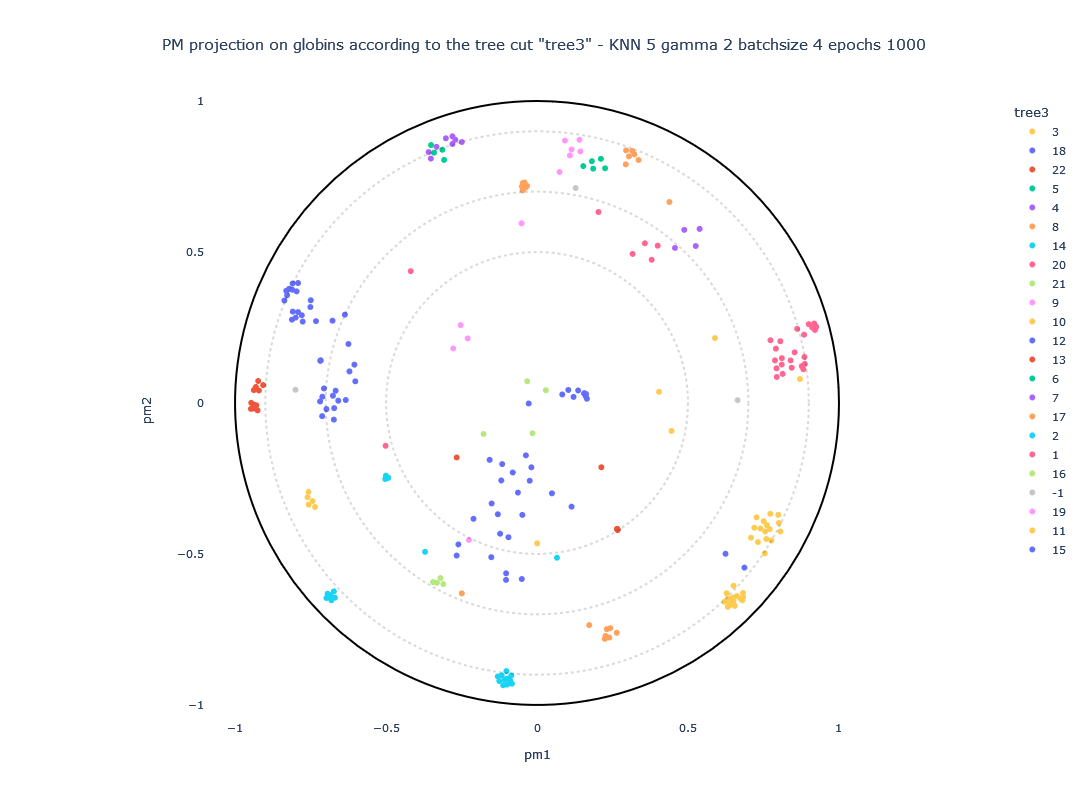

In [70]:
trace1 = plot_embedding_interactive(df5, 
                                    labels_name = 'tree3',
                                    #show_text=True,
                                    color_palette = globin_palette,
                                    title = "PM projection on globins according to the tree cut \"tree3\" - KNN 5 gamma 2 batchsize 4 epochs 1000", 
                                    fontsize = 11
                                   )
trace1.show()

## KNN 5 gamma 2 (batchsize 4 epochs 1000 rotate)

In [71]:
path_embedding = os.getcwd() + "/data/globins_out0.9_rot/batchsize4_epochs1000/PM5sigma=1.00gamma=2.00cosinepca=0_seed0.csv" 
path_annotation = os.getcwd() + "/data/globin_colors_new.csv"
df5 = read_embeddings(path_embedding, path_annotation, withroot=True)

ici                   pm1       pm2
proteins_id                    
1            0.036776 -0.105183
2           -0.250971  0.036009
3           -0.267656 -0.078951
4           -0.211204 -0.137204
5           -0.264735 -0.152516
...               ...       ...
249          0.852193 -0.010679
250          0.803275 -0.031390
251          0.835126 -0.079692
252         -0.395740  0.763850
0            0.000000  0.000000

[253 rows x 2 columns]
result:                    pm1       pm2 tree1 tree2 tree3 tree4  \
proteins_id                                               
0            0.000000  0.000000  root  root  root  root   
1            0.036776 -0.105183     5     3     3     2   
2           -0.250971  0.036009    -1    28    18    10   
3           -0.267656 -0.078951    -1    27    18    10   
4           -0.211204 -0.137204    37    27    18    10   
...               ...       ...   ...   ...   ...   ...   
248          0.797280  0.007985    14    10     9     3   
249          0.8

Index(['tree1', 'tree2', 'tree3', 'tree4', 'full_name', 'short_name',
       'full_species', 'short_species', 'evo_distance'],
      dtype='object')


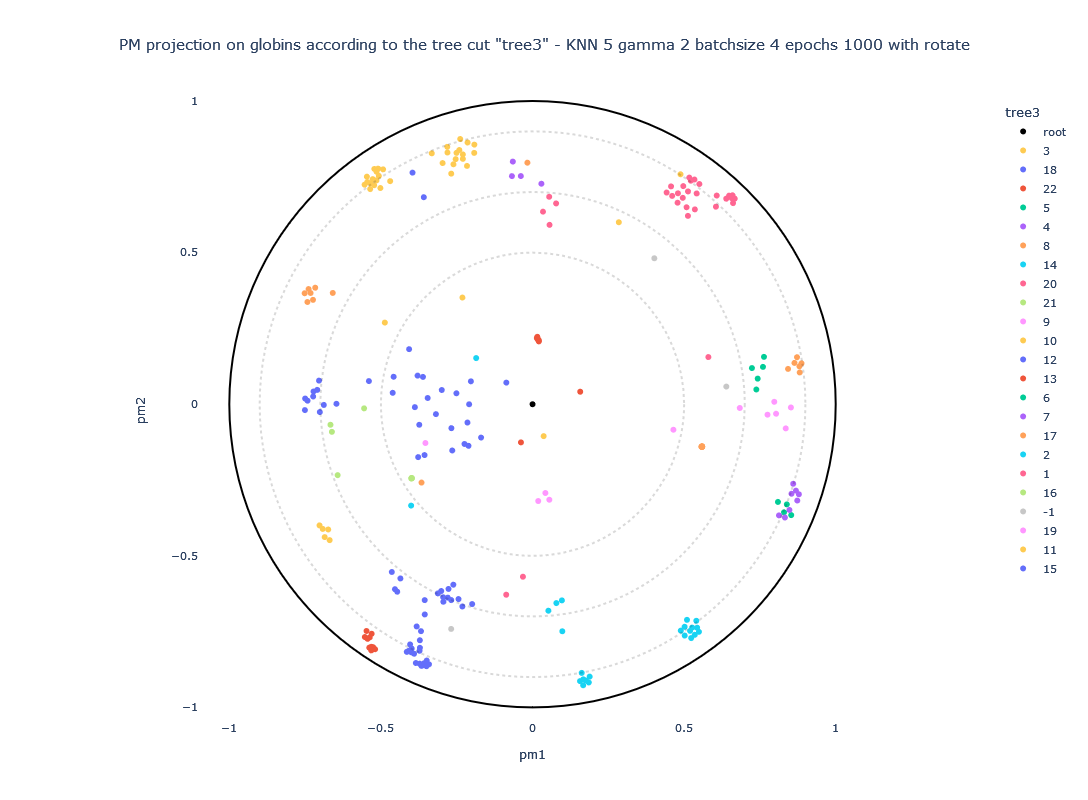

In [72]:
trace1 = plot_embedding_interactive(df5, 
                                    labels_name = 'tree3',
                                    color_palette = globin_palette,
                                    title = "PM projection on globins according to the tree cut \"tree3\" - KNN 5 gamma 2 batchsize 4 epochs 1000 with rotate", 
                                    fontsize = 11
                                   )
trace1.show()

## KNN 5 gamma 3 (batchsize 4 epochs 1000)

In [75]:
path_embedding = os.getcwd() + "/data/globins_out0.9/batchsize4_epochs1000/PM5sigma=1.00gamma=3.00cosinepca=0_seed0.csv" 
path_annotation = os.getcwd() + "/data/globin_colors_new.csv"
df5 = read_embeddings(path_embedding, path_annotation, withroot=False)

result:                    pm1       pm2 tree1 tree2 tree3 tree4  \
proteins_id                                               
1            0.186942 -0.017904     5     3     3     2   
2            0.036513 -0.021098    -1    28    18    10   
3           -0.078935 -0.053949    -1    27    18    10   
4           -0.157786 -0.082831    37    27    18    10   
5           -0.160374 -0.061366    37    27    18    10   
...               ...       ...   ...   ...   ...   ...   
248          0.677117  0.014234    14    10     9     3   
249          0.718214  0.033027    -1    10     9     3   
250          0.651850 -0.005570    14    10     9     3   
251          0.725063 -0.013989    14    10     9     3   
252          0.368718  0.645726    -1    25    15     8   

                           full_name       short_name  \
proteins_id                                             
1                 Globin C, coelomic           Globin   
2                  Globin (Fragment)           Globi

Index(['tree1', 'tree2', 'tree3', 'tree4', 'full_name', 'short_name',
       'full_species', 'short_species', 'evo_distance'],
      dtype='object')


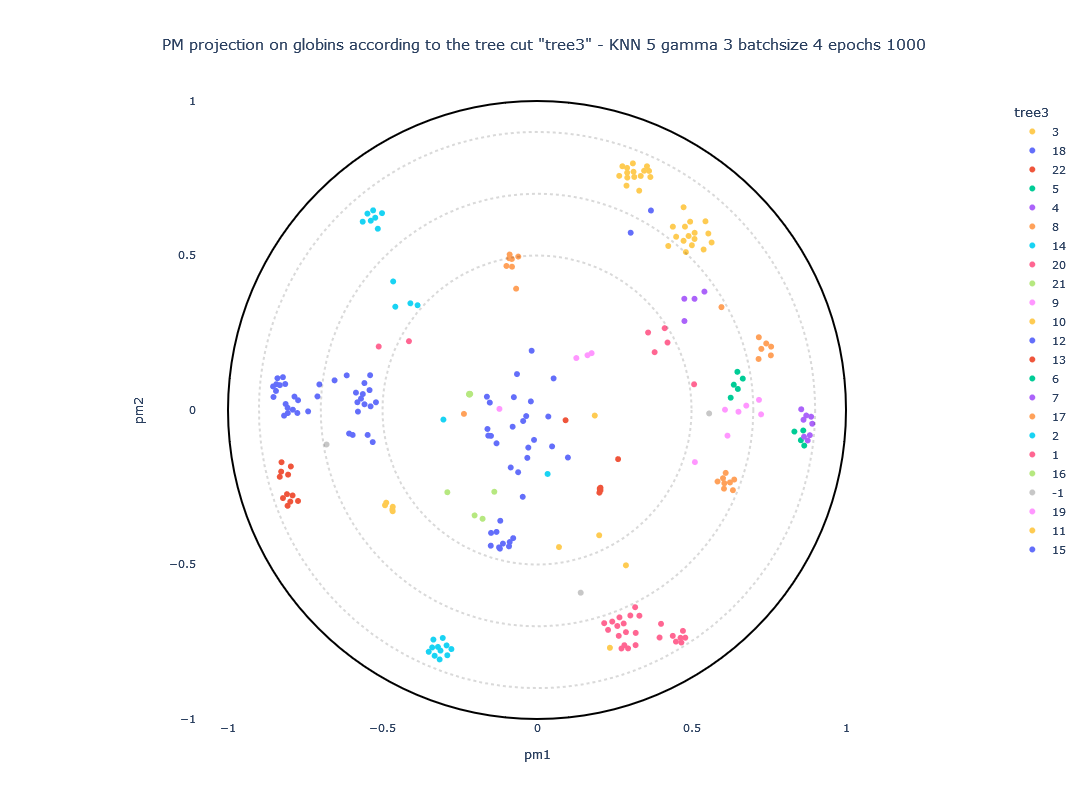

In [76]:
trace1 = plot_embedding_interactive(df5, 
                                    labels_name = 'tree3',
                                    show_text=True, 
                                    color_palette = globin_palette,
                                    title = "PM projection on globins according to the tree cut \"tree3\" - KNN 5 gamma 3 batchsize 4 epochs 1000", 
                                    fontsize = 11
                              )
trace1.show()

## KNN 5 gamma 3 (batchsize 4 epochs 1000 rotate)

In [77]:
path_embedding = os.getcwd() + "/data/globins_out0.9_rot/batchsize4_epochs1000/PM5sigma=1.00gamma=3.00cosinepca=0_seed0.csv" 
path_annotation = os.getcwd() + "/data/globin_colors_new.csv"
df5 = read_embeddings(path_embedding, path_annotation, withroot=True)

ici                   pm1       pm2
proteins_id                    
0            0.000000  0.000000
1           -0.242002 -0.046828
2           -0.083632 -0.222143
3           -0.158901 -0.087005
4           -0.170887 -0.055041
...               ...       ...
248         -0.398763 -0.022144
249         -0.379136 -0.024972
250         -0.388414 -0.025771
251         -0.378238 -0.025268
252         -0.121818  0.623568

[253 rows x 2 columns]
result:                    pm1       pm2 tree1 tree2 tree3 tree4  \
proteins_id                                               
0            0.000000  0.000000  root  root  root  root   
1           -0.242002 -0.046828     5     3     3     2   
2           -0.083632 -0.222143    -1    28    18    10   
3           -0.158901 -0.087005    -1    27    18    10   
4           -0.170887 -0.055041    37    27    18    10   
...               ...       ...   ...   ...   ...   ...   
248         -0.398763 -0.022144    14    10     9     3   
249         -0.3

Index(['tree1', 'tree2', 'tree3', 'tree4', 'full_name', 'short_name',
       'full_species', 'short_species', 'evo_distance'],
      dtype='object')


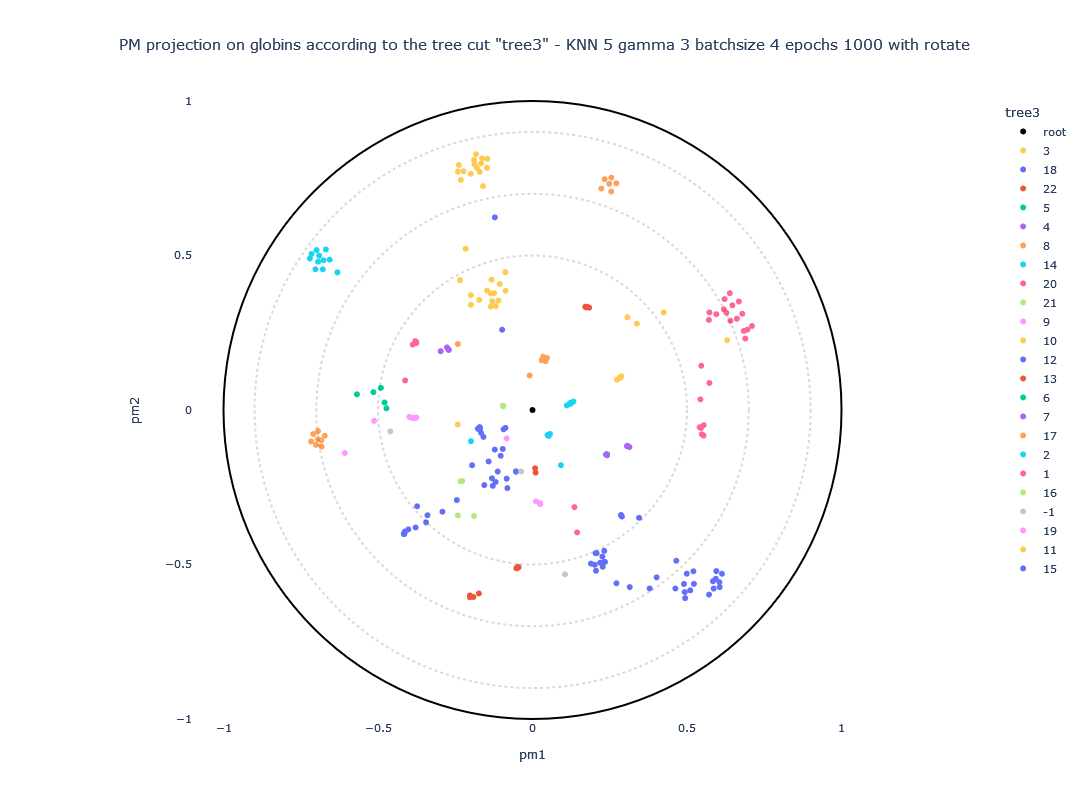

In [78]:
trace1 = plot_embedding_interactive(df5, 
                                    labels_name = 'tree3',
                                    show_text=True,
                                    color_palette = globin_palette,
                                    title = "PM projection on globins according to the tree cut \"tree3\" - KNN 5 gamma 3 batchsize 4 epochs 1000 with rotate",
                                    fontsize = 11
                              )
trace1.show()

# Globins0.9 - by evolutive distance (evo_distance)

## KNN 6 gamma 2 (batchsize 4 epochs 1000)

In [79]:
path_embedding = os.getcwd() + "/data/globins_out0.9/batchsize4_epochs1000/PM6sigma=1.00gamma=2.00cosinepca=0_seed0.csv" 
path_annotation = os.getcwd() + "/data/globin_colors_new.csv"
df6 = read_embeddings(path_embedding, path_annotation, withroot=False)

result:                    pm1       pm2 tree1 tree2 tree3 tree4  \
proteins_id                                               
1            0.094520 -0.020237     5     3     3     2   
2            0.288463  0.100659    -1    28    18    10   
3            0.293880  0.246645    -1    27    18    10   
4            0.289246  0.311650    37    27    18    10   
5            0.288831  0.327628    37    27    18    10   
...               ...       ...   ...   ...   ...   ...   
248         -0.222689 -0.614549    14    10     9     3   
249         -0.244695 -0.636233    -1    10     9     3   
250         -0.233987 -0.574343    14    10     9     3   
251         -0.276448 -0.611828    14    10     9     3   
252         -0.767432 -0.178713    -1    25    15     8   

                           full_name       short_name  \
proteins_id                                             
1                 Globin C, coelomic           Globin   
2                  Globin (Fragment)           Globi

Index(['tree1', 'tree2', 'tree3', 'tree4', 'full_name', 'short_name',
       'full_species', 'short_species', 'evo_distance'],
      dtype='object')


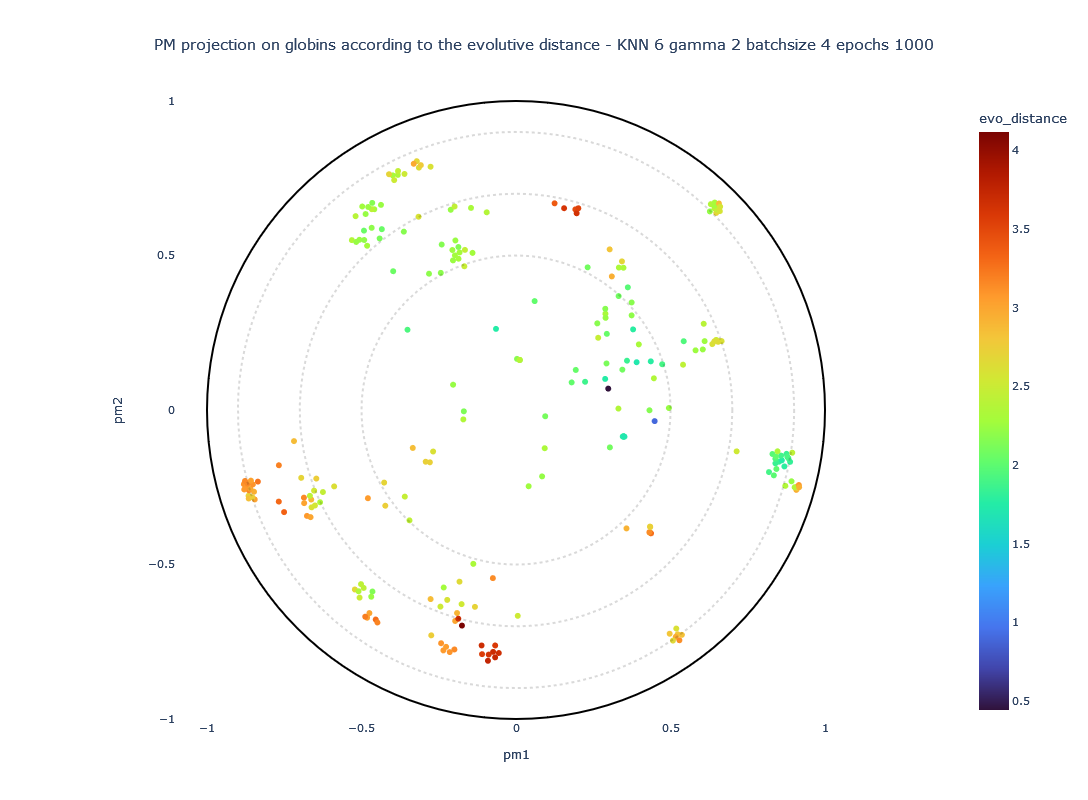

In [80]:
trace1 = plot_embedding_interactive(df6, 
                                    labels_name = 'evo_distance',#'1_Group',#'2_Gene', 
                                    show_text=True, 
                                    title = "PM projection on globins according to the evolutive distance - KNN 6 gamma 2 batchsize 4 epochs 1000",
                                    fontsize = 11
                              )
trace1.show()

## KNN 6 gamma 2 (batchsize 4 epochs 1000 rotate)

In [81]:
path_embedding = os.getcwd() + "/data/globins_out0.9_rot/batchsize4_epochs1000/PM6sigma=1.00gamma=2.00cosinepca=0_seed0.csv" 
path_annotation = os.getcwd() + "/data/globin_colors_new.csv"
df6 = read_embeddings(path_embedding, path_annotation, withroot=True)

ici                   pm1       pm2
proteins_id                    
0            0.000000  0.000000
1           -0.104789 -0.078420
2           -0.212542  0.038752
3           -0.219747 -0.038307
4           -0.212564 -0.078209
...               ...       ...
248          0.223572  0.410278
249          0.187930  0.408034
250          0.189685  0.378373
251          0.143906  0.410937
252          0.646287 -0.236569

[253 rows x 2 columns]
result:                    pm1       pm2 tree1 tree2 tree3 tree4  \
proteins_id                                               
0            0.000000  0.000000  root  root  root  root   
1           -0.104789 -0.078420     5     3     3     2   
2           -0.212542  0.038752    -1    28    18    10   
3           -0.219747 -0.038307    -1    27    18    10   
4           -0.212564 -0.078209    37    27    18    10   
...               ...       ...   ...   ...   ...   ...   
248          0.223572  0.410278    14    10     9     3   
249          0.1

Index(['tree1', 'tree2', 'tree3', 'tree4', 'full_name', 'short_name',
       'full_species', 'short_species', 'evo_distance'],
      dtype='object')


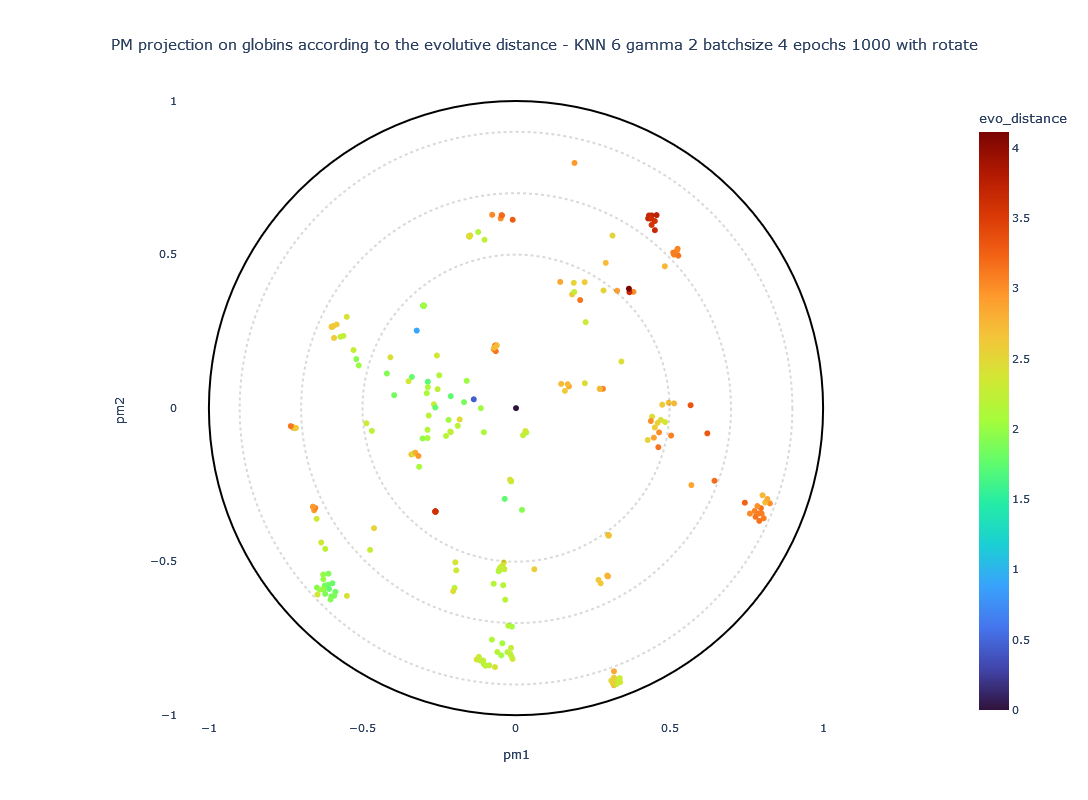

In [82]:
trace1 = plot_embedding_interactive(df6, 
                                    labels_name = 'evo_distance',#'1_Group',#'2_Gene', 
                                    show_text=True, 
                                    title = "PM projection on globins according to the evolutive distance - KNN 6 gamma 2 batchsize 4 epochs 1000 with rotate",
                                    fontsize = 11
                              )
trace1.show()